# Document Alignment
### Complete # TODO

In [12]:
# Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Read Tempalate and Scanned Image

In [13]:
# Define the path to the reference image file using os.path.join for cross-platform compatibility
refFilename = os.path.join("images", "form.jpg")
# Read the reference image in color mode
im1 = cv2.imread(refFilename)

# Convert the reference image from BGR to RGB format
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 

# Define the path to the image to be aligned using os.path.join for cross-platform compatibility
imFilename = os.path.join("images", "scanned-form.jpg")

# Read the image to be aligned in color mode
im2 = cv2.imread(imFilename) 

# Convert the image to be aligned from BGR to RGB format
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)  


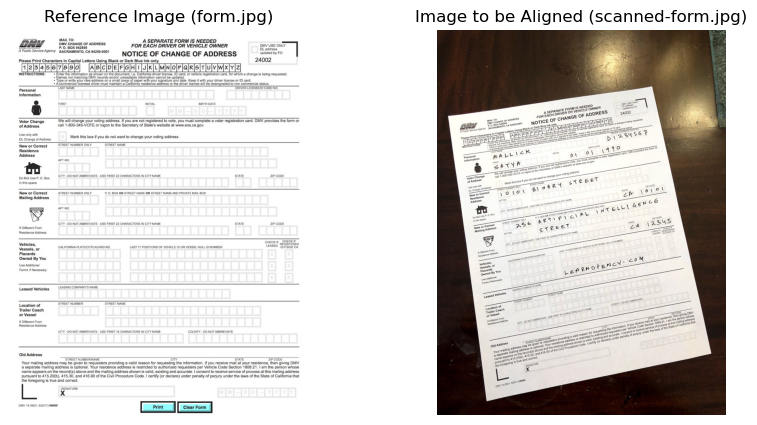

In [14]:
# Display the reference image (im1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.imshow(im1)
plt.title('Reference Image (form.jpg)')
plt.axis('off')  

# Display the image to be aligned (im2)
plt.subplot(1, 2, 2)
plt.imshow(im2)
plt.title('Image to be Aligned (scanned-form.jpg)')
plt.axis('off')  

# Show the images
plt.show()


## Step 2: Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations

In [15]:
# Define the path to the reference image file using os.path.join for cross-platform compatibility
refFilename = os.path.join("images", "form.jpg")
im1 = cv2.imread(refFilename)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Define the path to the image to be aligned using os.path.join for cross-platform compatibility
imFilename = os.path.join("images", "scanned-form.jpg")
im2 = cv2.imread(imFilename)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

# Convert images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

# Detect ORB features using OpenCV and compute descriptors.
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)

keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Draw keypoints on the images
im1_display = cv2.drawKeypoints(
    im1,
    keypoints1,
    outImage=np.array([]),
    color=(255, 0, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

im2_display = cv2.drawKeypoints(
    im2,
    keypoints2,
    outImage=np.array([]),
    color=(255, 0, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

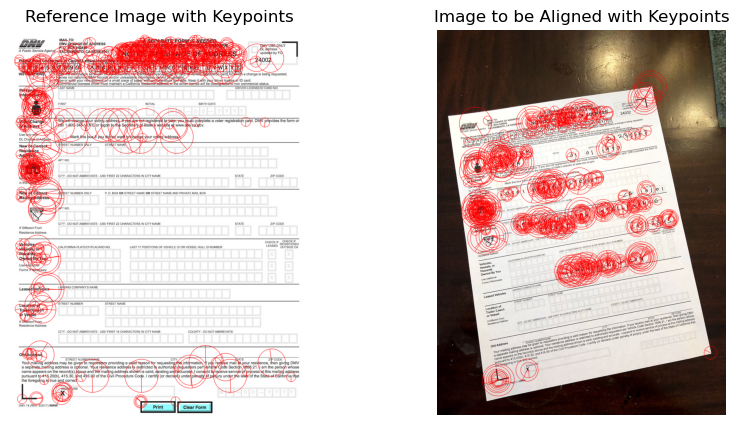

In [16]:

# Plot the images with keypoints
plt.figure(figsize=(10, 5))

# Display the reference image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(im1_display)
plt.title('Reference Image with Keypoints')
plt.axis('off')

# Display the image to be aligned with keypoints
plt.subplot(1, 2, 2)
plt.imshow(im2_display)
plt.title('Image to be Aligned with Keypoints')
plt.axis('off')

# Show the images
plt.show()

## Step 3 : Match keypoints in the two image

In [17]:
# Create a DescriptorMatcher object with the BRUTEFORCE_HAMMING algorithm.
# This matcher is used to compare feature descriptors and find the best matches.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match the feature descriptors from two images.
# The match() function finds the best matches between descriptors1 and descriptors2.
# The resulting matches are stored in a list.
matches = list(matcher.match(descriptors1, descriptors2))

# Sort the matches based on their distance.
# The distance represents how similar the matched descriptors are.
# Sorting in ascending order (reverse=False) means the best matches (lowest distance) come first.
matches.sort(key=lambda x: x.distance, reverse=False)

# Determine the number of good matches to keep.
# Here, we keep the top 10% of matches.
numGoodMatches = int(len(matches) * 0.1)

# Slice the sorted matches to keep only the top 'numGoodMatches'.
matches = matches[:numGoodMatches]


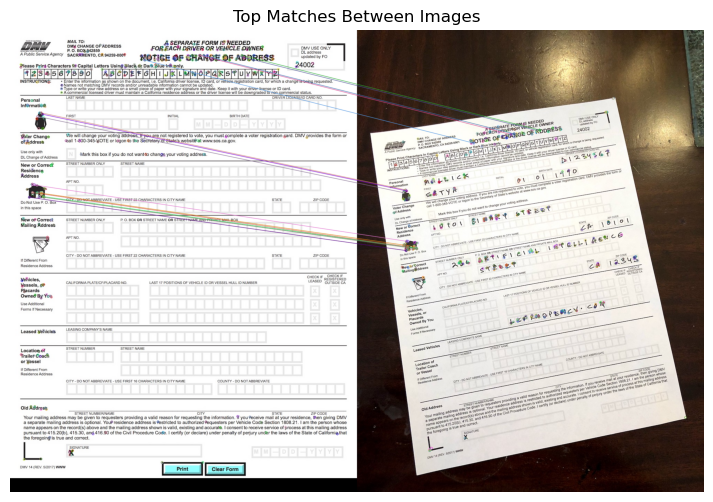

In [18]:
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

# Display im_matches
plt.figure(figsize=(12, 6))
plt.imshow(im_matches)
plt.title('Top Matches Between Images')
plt.axis('off') 
plt.show()


## Step 4:  Find Homography



In [19]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt  
    points2[i, :] = keypoints2[match.trainIdx].pt 

# Find homography using RANSAC to reduce the effect of outliers
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Optional: Show the homography matrix
print("Homography Matrix:")
print(h)


Homography Matrix:
[[ 1.38778214e+00 -2.02487694e-01 -6.05441237e+00]
 [ 2.22580457e-01  1.52854720e+00 -4.84583394e+02]
 [-8.40318143e-05  1.39382951e-04  1.00000000e+00]]


## Step 5: Warp image

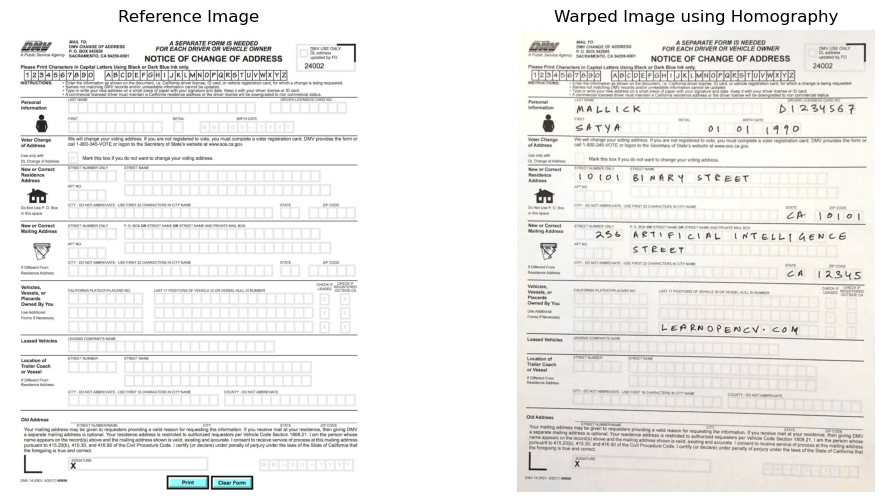

In [20]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Display results
plt.figure(figsize=(12, 6))

# Display the original reference image
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.title('Reference Image')
plt.axis('off')

# Display the warped image
plt.subplot(1, 2, 2)
plt.imshow(im2_reg)
plt.title('Warped Image using Homography')
plt.axis('off')

# Show the images
plt.show()



### گزارش مختصر: تراز کردن تصاویر با استفاده از هموگرافی

#### ۱. مقدمه
این پروژه با هدف تطبیق و تراز کردن دو تصویر مختلف انجام شد. تصاویر به‌عنوان ورودی گرفته شده و سپس با استفاده از تکنیک‌های بینایی ماشین و الگوریتم‌های تشخیص ویژگی‌ها (مانند ORB) و هموگرافی، تصویر دوم بر اساس ویژگی‌های تصویر اول تغییر داده شد.

#### ۲. مراحل انجام پروژه

##### ۲.۱. بارگذاری تصاویر
در ابتدا دو تصویر بارگذاری شدند:
- **تصویر مرجع (Reference Image)**: این تصویر به‌عنوان مبنای تراز کردن انتخاب شد.
- **تصویر مورد نظر برای تراز کردن (Image to be Aligned)**: این تصویر باید به‌گونه‌ای تغییر داده شود که ویژگی‌هایش با تصویر مرجع تطبیق کند.

##### ۲.۲. تبدیل به فضای رنگی RGB
تصاویر اولیه که به‌صورت BGR بارگذاری شده بودند، به فرمت RGB تبدیل شدند تا بتوان از آن‌ها در عملیات‌های بعدی استفاده کرد.

##### ۲.۳. تشخیص ویژگی‌ها با استفاده از الگوریتم ORB
از الگوریتم ORB (Oriented FAST and Rotated BRIEF) برای شناسایی ویژگی‌ها و توصیف‌کننده‌ها در هر دو تصویر استفاده شد. این الگوریتم توانایی تشخیص نقاط کلیدی منحصر به فرد در تصاویر را دارد که می‌تواند برای تطبیق تصاویر مورد استفاده قرار گیرد.

##### ۲.۴. تطابق ویژگی‌ها
توصیف‌کننده‌های استخراج‌شده از تصاویر با استفاده از الگوریتم BRUTEFORCE_HAMMING تطبیق داده شدند. تطابق‌ها بر اساس فاصله‌های آن‌ها مرتب شدند و بهترین تطابق‌ها (با کمترین فاصله) انتخاب شدند.

##### ۲.۵. استفاده از RANSAC برای کاهش اثر نقاط نادرست
برای کاهش تأثیر نقاط تطابق اشتباه (outliers)، از الگوریتم RANSAC برای محاسبه هموگرافی استفاده شد. این الگوریتم قادر است نقاط تطابق معتبر را از نقاط غیر معتبر تفکیک کند و در نهایت ماتریس هموگرافی دقیق‌تری محاسبه کند.

##### ۲.۶. محاسبه و نمایش هموگرافی
ماتریس هموگرافی که رابطه هندسی بین دو تصویر را مشخص می‌کند، با استفاده از نقاط تطابق معتبر محاسبه شد. این ماتریس برای تغییر شکل تصویر دوم به‌گونه‌ای استفاده شد که تطابق آن با تصویر اول به حداکثر برسد.

##### ۲.۷. تغییر شکل تصویر دوم
تصویر دوم با استفاده از ماتریس هموگرافی محاسبه‌شده تغییر شکل داده شد تا ویژگی‌هایش با تصویر مرجع تطبیق کند. این عملیات به کمک تابع `cv2.warpPerspective` انجام شد.

#### ۳. نتیجه
پس از انجام مراحل فوق، تصویر دوم (تصویر تراز شده) نمایش داده شد که ویژگی‌هایش به‌خوبی با تصویر مرجع تطبیق کرده بود. نمایش تطابق‌ها و نقاط کلیدی به وضوح تطابق ویژگی‌ها و کیفیت تراز کردن را نشان داد.

#### ۴. نتیجه‌گیری
این پروژه به‌خوبی نشان داد که با استفاده از الگوریتم‌های تشخیص ویژگی‌ها و هموگرافی، می‌توان تصاویر مختلف را به‌طور دقیق تراز کرد. این تکنیک‌ها در بسیاری از برنامه‌های بینایی ماشین و پردازش تصویر کاربرد دارند، مانند ترکیب تصاویر، جلب توجه به اشیاء، و تشخیص حرکت.
